In [1]:
import ROOT as r

Welcome to JupyROOT 6.12/06


In [3]:
f = r.TFile("data/calibratedDeltaT_TQ01.root")
deltaTPlots = []
for i in range(0,24):
    deltaTPlots.append(f.Get("neighboringCrystalsDeltaT/hitDeltaT"+str(i)))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: pdf file calo2xtal24CalibratedLog.pdf has been created
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: pdf file calo2xtal25CalibratedLog.pdf has been created
Info in <TCanvas::Print>: pdf file calo2xtal26CalibratedLog.pdf has been created
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: pdf file calo2xtal27CalibratedLog.pdf has been created
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fi

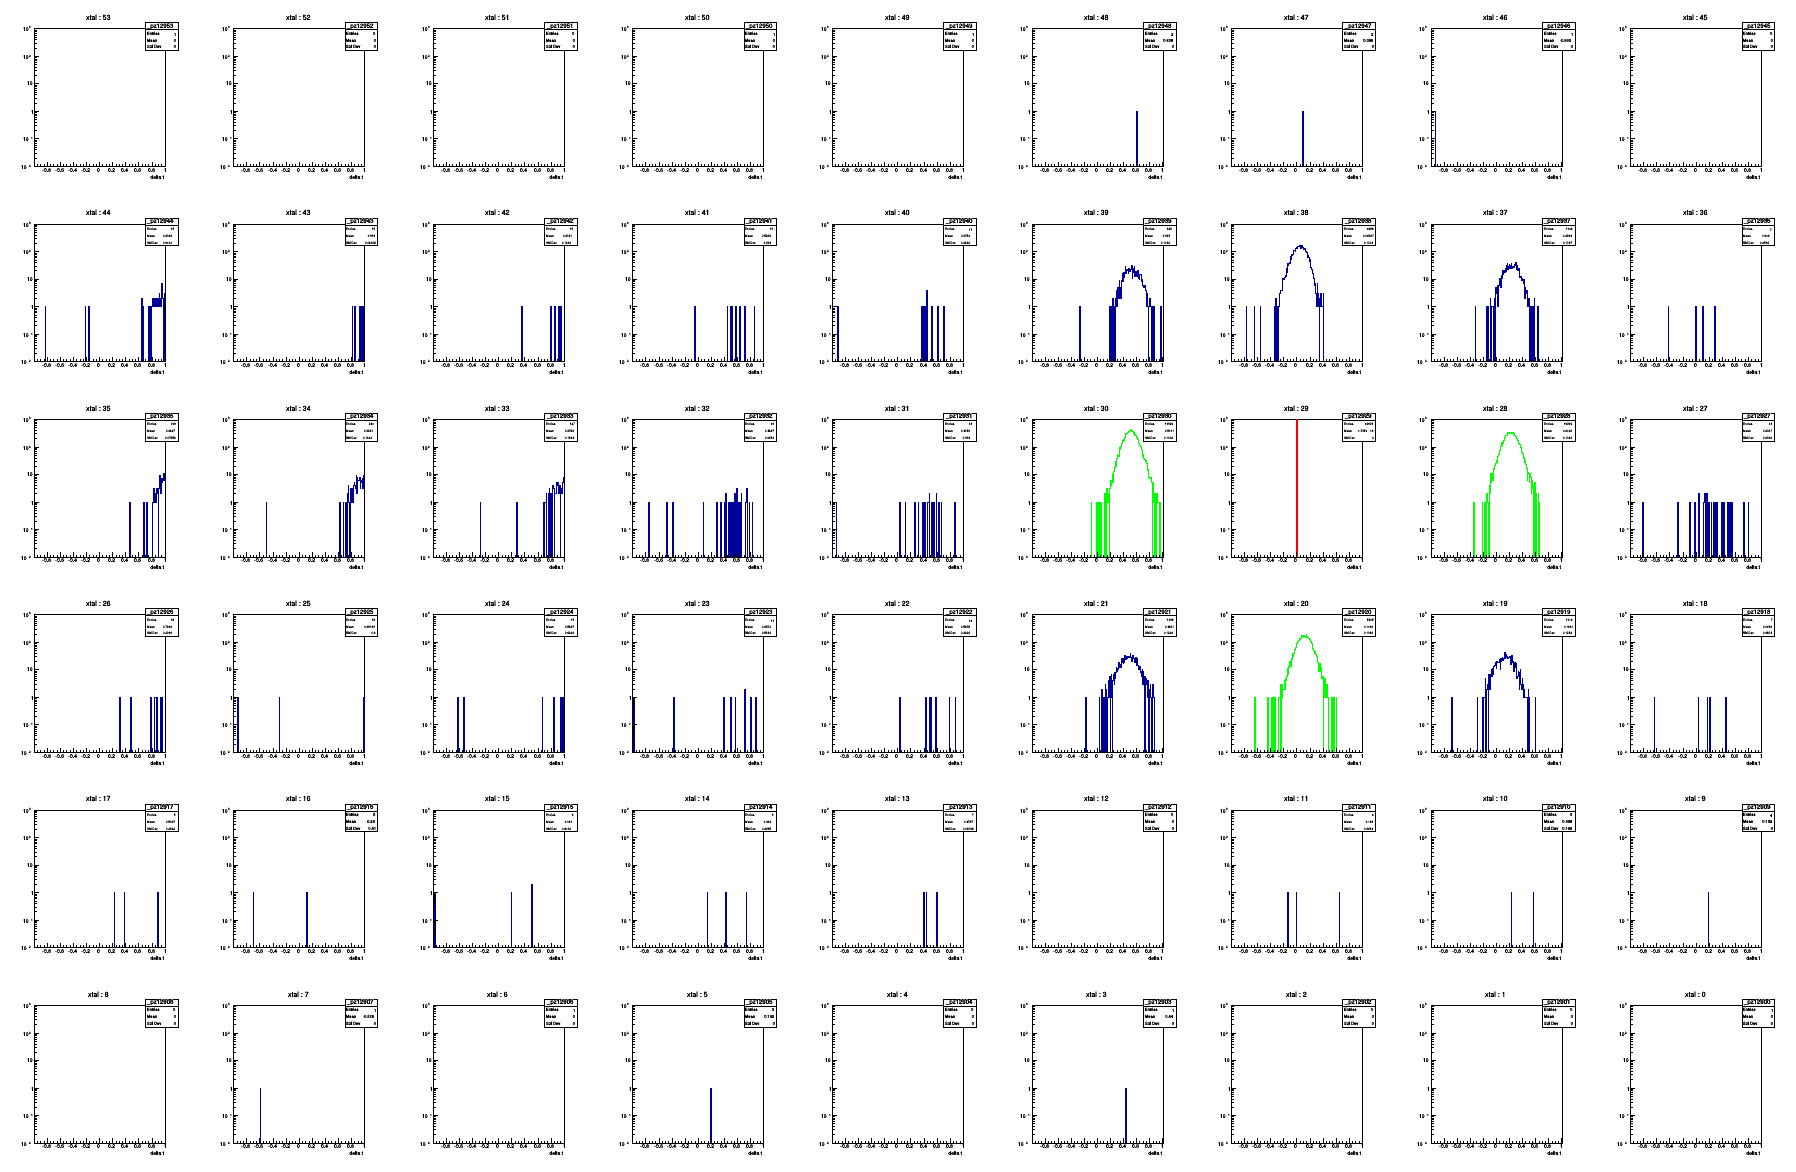

In [8]:
#r.gPad.SetLogy()
c1 = r.TCanvas("c1","c1",1800,1200)
c1.Divide(9,6)
for cN in range(1,2):
    for j in range (24,30):
        tempHists = []
        for k in range(0,54):   
            tempHists.append(deltaTPlots[cN].ProjectionZ("_pz"+str(10000*cN + 100*j +k),j+1,j+1,k+1,k+1,""))
            c1.cd(54 - k)
            r.gPad.SetLogy()
            tempHists[k].Rebin(2)
            if(k + 1 == j+1):
                tempHists[k].SetLineColor(r.kRed)
            elif tempHists[k].GetEntries() > 5000 :
                tempHists[k].SetLineColor(r.kGreen)
            tempHists[k].SetTitle("xtal : "+str(k))
            tempHists[k].Fit("gaus","Q","",-1,1)
            tempHists[k].GetYaxis().SetRangeUser(0.01,1000)
            tempHists[k].Draw("hist")
            c1.Update()
        c1.Draw()
        c1.SaveAs("calo"+str(cN+1)+"xtal"+str(j)+"CalibratedLog.pdf")

In [3]:
jasonConstants = [0.000,-0.038,-0.138,0.167,0.028,-0.033,0.366,0.369,0.321,-0.130,-0.069,-0.245,0.033,0.049,-0.027,0.370,0.246,0.188,-0.122,-0.120,-0.146,0.031,-0.032,-0.014,0.303,0.307,0.237,-0.105,-0.224,-0.203,0.128,0.033,-0.050,0.372,0.286,0.324,-0.118,-0.241,-0.330,0.208,0.061,-0.020,0.407,0.228,0.218,-0.058,-0.115,-0.038,0.083,0.033,0.036,0.302,0.304,0.219]
aaronConstants = [ 0.0, -0.04189799, -0.14667005, 0.15186035, 0.0077394, -0.05724904,
 0.33419612 , 0.32970214, 0.28367451, -0.12487399, -0.07309324, -0.25218554,
 0.02224657,  0.03335744, -0.04893549,  0.34330585,  0.2118064,   0.15040881,
-0.11842446, -0.12254924, -0.15300636,  0.01847523, -0.04881901, -0.0371315,
 0.27473779,  0.2711359,   0.19871706, -0.09793178, -0.2231177,  -0.20685778,
 0.118553,    0.01860166, -0.07122232,  0.34539447,  0.25794377,  0.29580152,
-0.11279109, -0.24029832, -0.33475026,  0.19903134,  0.04421188, -0.03968536,
 0.38385236,  0.20132554,  0.18760155, -0.05508421, -0.11291784, -0.04979742,
 0.07790285,  0.02180708,  0.02268355,  0.28933159,  0.2864422,   0.19633908]


****************************************
Minimizer is Linear
Chi2                      =   0.00360348
NDf                       =           52
p0                        =   -0.0119628   +/-   0.00120062  
p1                        =     0.948885   +/-   0.00589894  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


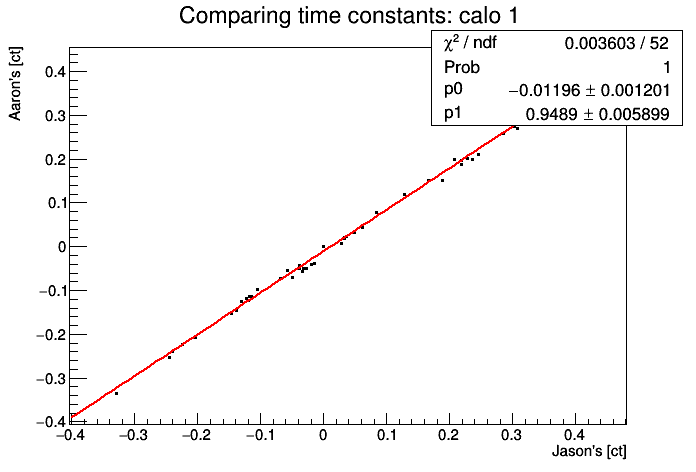

In [9]:
compareConstants = r.TGraph()
for k in range (0,54):
    compareConstants.SetPoint(k,jasonConstants[k],aaronConstants[k])
c1 = r.TCanvas("c1","c1",700,500)
compareConstants.SetTitle("Comparing time constants: calo 1; Jason's [ct]; Aaron's [ct]")
compareConstants.SetMarkerStyle(7)
compareConstants.Fit("pol1")
r.gStyle.SetOptFit(1111)
compareConstants.Draw("apz")
c1.Draw()

 FCN=11.4136 FROM MIGRAD    STATUS=CONVERGED      90 CALLS          91 TOTAL
                     EDM=4.56363e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.43120e+00   5.30250e-01   6.40924e-04   4.72770e-05
   2  Mean         9.16720e-03   2.07742e-03   3.53629e-06  -7.88153e-03
   3  Sigma        9.13173e-03   2.99693e-03   1.66961e-04   2.55338e-04


Warning in <TROOT::Append>: Replacing existing TH1: compareConstants (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


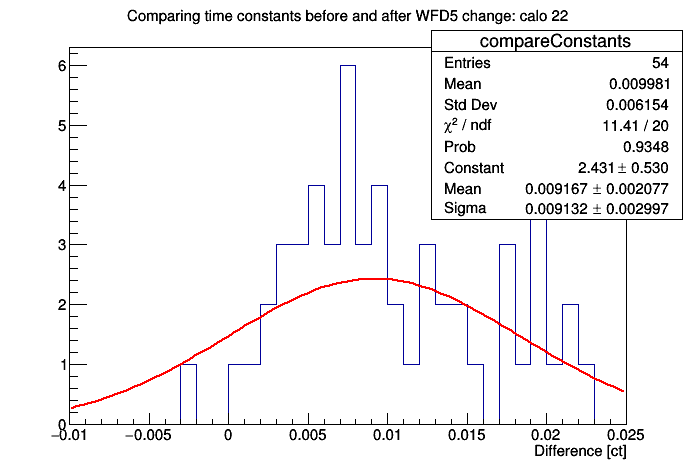

In [9]:
%jsroot off
beforeSwap = [-0.000, -0.104, 0.768, 0.356, 0.201, 0.181, 0.553, 0.443, 0.382, 0.060, -0.102, -0.046, 0.272, 0.207, 0.132, 0.570, 0.412, 0.361, -0.041, -0.077, -0.179, 0.185, 0.204, 0.030, 0.448, 0.356, 0.319, 0.114, -0.085, -0.128, 0.321, 0.211, 0.087, 0.454, 0.496, 0.324, 0.005, -0.066, -0.093, 0.183, 0.195, 0.124, 0.443, 0.353, 0.344, 0.071, 0.009, -0.069, 0.297, 0.229, 0.177, 0.514, 0.467, 0.418]
afterSwap = [-0.000, -0.102, 0.775, 0.361, 0.207, 0.192, 0.567, 0.458, 0.399, 0.066, -0.095, -0.040, 0.280, 0.216, 0.142, 0.583, 0.429, 0.380, -0.038, -0.073, -0.171, 0.192, 0.214, 0.039, 0.462, 0.374, 0.340, 0.119, -0.073, -0.121, 0.326, 0.220, 0.095, 0.457, 0.515, 0.345, 0.007, -0.064, -0.089, 0.190, 0.202, 0.136, 0.460, 0.372, 0.365, 0.068, 0.013, -0.064, 0.305, 0.240, 0.189, 0.528, 0.487, 0.44]

compareConstants = r.TH1D("compareConstants","compareConstants",35,-0.01,0.025)
for k in range (0,54):
    compareConstants.Fill(afterSwap[k]-beforeSwap[k])
c1 = r.TCanvas("c1","c1",700,500)
compareConstants.SetTitle("Comparing time constants before and after WFD5 change: calo 22; Difference [ct]")
#compareConstants.SetMarkerStyle(7)
compareConstants.Fit("gaus")
#r.gStyle.SetOptFit(1111)
compareConstants.Draw()
c1.Draw()